In [17]:
# Analyse de données
import pandas as pd
import numpy as np
from datetime import datetime
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Standardisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Découpage du dataset
from sklearn.model_selection import train_test_split
# Modélisation
from sklearn.linear_model import LinearRegression
# métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
df = pd.read_csv('data/carData_cleaned.csv')

## Nettoyage et préparation des données

In [19]:
# Ajout de la variable âge : Car_Age
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']


## Selection de la variable à expliquer

In [20]:
# Target
y = df["Selling_Price"]

## Selection de la variable explicative

In [21]:
# Car-Age
X = df[['Car_Age']]

## Division du dataset : jeu d'entrainement, jeu de test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrainement du modèle

In [23]:
# Modèle
lin_reg = LinearRegression()

# Entrainement
lin_reg.fit(X_train, y_train)

LinearRegression()

## Prédiction

In [24]:
# Prédictions BRUT
y_pred = lin_reg.predict(X_test)

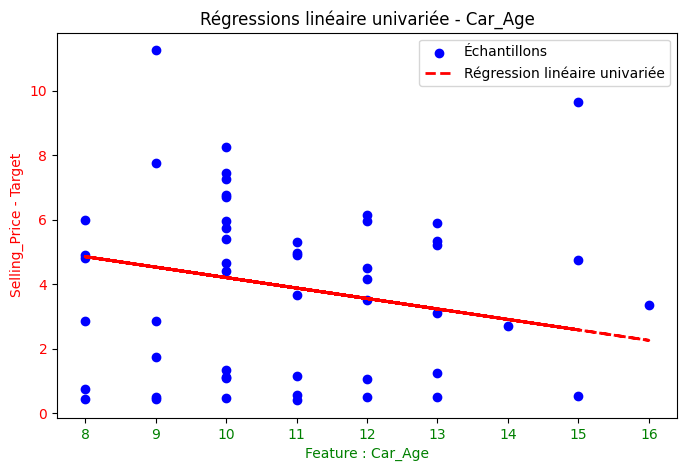

In [25]:
plt.figure(figsize=(8, 5))

# Jeu de test
plt.scatter(X_test, y_test, color='blue', label="Échantillons")

# Droite de régression BRUT
plt.plot(X_test, y_pred, '--', color='red', linewidth=2, label="Régression linéaire univariée")

# Labels et titre
plt.xlabel("Feature : Car_Age", color="green")
plt.xticks(color="green")
plt.ylabel("Selling_Price - Target", color="red")
plt.yticks(color="red")
plt.title("Régressions linéaire univariée - Car_Age")
plt.legend()


## Métriques

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MAE:  {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2: {r2}")


MAE:  2.2975342585958383
MSE: 7.627115641513374
RMSE: 2.7617233100934233
R2: -0.05404185059951927
